In [1]:
#샘플 코퍼스 다운로드
import nltk 
nltk.download('book',quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [4]:
#저작권이 만료된 문학작품이 포함된 코퍼스
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [6]:
#제인 오스틴의 엠마 문서
emma_raw=nltk.corpus.gutenberg.raw('austen-emma.txt')
emma_raw[:500]

"[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.  Her mother\nhad died t"

In [10]:
#문장 구분
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000]))
sent_tokenize(emma_raw[:1000])[3] #인덱스 3번 문장

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.', "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.", 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.', "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.", 'Between _them_ it was more the intimacy\nof sisters.', 'Even before Miss Taylor had ceased to hold the nominal\noff

"Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma."

In [8]:
#단어 구분
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[50:100]) #50~99 단어

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [11]:
#어간 추출(접미사,어미를 제거)
from nltk.stem import PorterStemmer, LancasterStemmer
st1=PorterStemmer()
st2=LancasterStemmer()
words=['fly','flies','flying','flew','flown']
print([st1.stem(w) for w in words])
print([st2.stem(w) for w in words])

['fli', 'fli', 'fli', 'flew', 'flown']
['fly', 'fli', 'fly', 'flew', 'flown']


In [12]:
#원형 복원(비슷한 의미를 가지는 여러 단어를 사전형으로 통일하는 작업)
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()
words=['fly','flies','flying','flew','flown']
#동사 원형을 추출
[lm.lemmatize(w,pos='v') for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

['Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', 'She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', 'indulgent', 'father', 'and', 'had', 'in', 'consequence', 'of', 'her', 'sister', 's', 'marriage', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', 'Her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses', 'and', 'her', 'place', 'had', 'been', 'supplied', 'by', 'an', 'excellent', 'woman', 'as', 'governess', 'who', 'had', 'fallen', 'littl

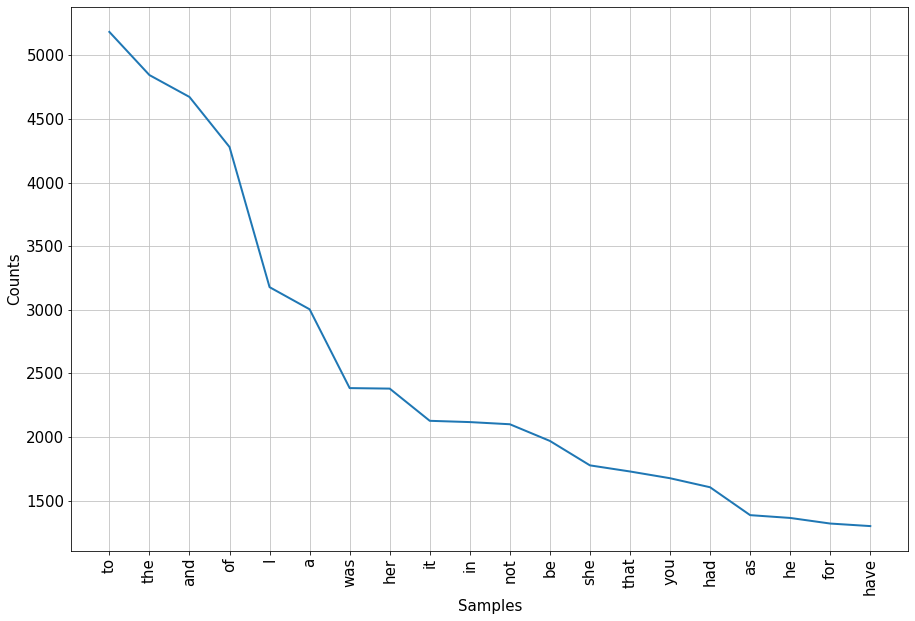

In [19]:
#단어의 출현빈도를 그래프로 출력
%matplotlib inline
from nltk import Text
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer

retokenize=RegexpTokenizer('[\w]+') #특수문자 제거 옵션
#print(retokenize.tokenize(emma_raw[50:100])) #단어 추출
text=Text(retokenize.tokenize(emma_raw))
print(list(text))
plt.rcParams['figure.figsize']=(15,10)
plt.rcParams['font.size']=15
text.plot(20) #상위 20단어의 출현빈도 그래프
plt.show()

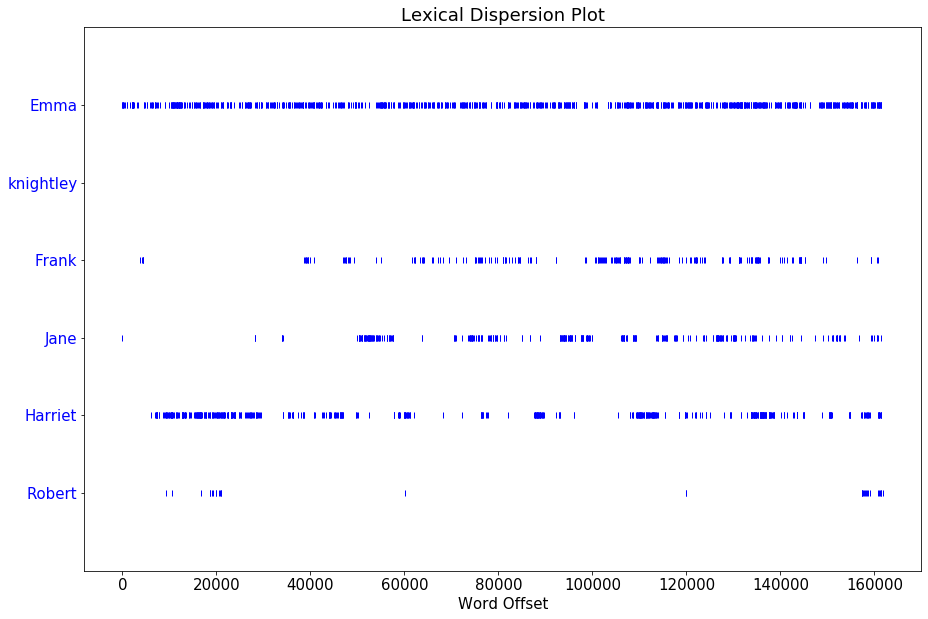

In [20]:
#단어가 사용된 위치 시각화
text.dispersion_plot(['Emma','knightley','Frank','Jane',
                     'Harriet','Robert'])


In [22]:
#해당 단어의 앞뒤에 사용된 단어
text.concordance('Emma')

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [23]:
#같은 단어의 앞뒤에 사용된 단어 대신 사용된 횟수가 높은 단어들
text.similar('Emma')

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [30]:
from nltk import FreqDist
from nltk.tag import pos_tag
stopwords=['Mr.','Mrs.','Miss','Mr','Mrs','Dear'] #불용어 사전
emma_tokens=pos_tag(retokenize.tokenize(emma_raw)) #품사 태깅
#print(emma_tokens)
# 고유대명사이고 불용어가 아닌 단어 리스트
names_list=[t[0] for t in emma_tokens if t[1] =='NNP'
           and t[0] not in stopwords]
#print(names_list)
fd_names=FreqDist(names_list) #단어의 사용빈도
print(list(fd_names))

['Jane', 'Austen', 'VOLUME', 'Emma', 'Woodhouse', 'Sixteen', 'Taylor', 'Between', 'Sorrow', 'Weston', 'A', 'Isabella', 'How', 'Her', 'London', 'October', 'November', 'Hartfield', 'Christmas', 'Highbury', 'Matrimony', 'Poor', 'Randalls', 'No', 'James', 'Hannah', 'Nobody', 'Whenever', 'Knightley', 'Brunswick', 'Square', 'Dirty', 'Look', 'Well', 'Who', 'Ah', 'Tis', 'My', '_you_', 'Oh', 'Every', 'Pray', 'Ever', 'Broadway', 'Lane', 'Farmer', 'Mitchell', 'Success', 'Where', 'Elton', 'Invite', 'Depend', 'CHAPTER', 'II', 'Captain', 'Churchill', 'Yorkshire', 'Enscombe', 'Churchills', 'Frank', 'Perry', 'Bates', 'Perrys', 'III', 'Donwell', 'Abbey', 'Real', 'Goddard', 'School', 'Boarding', 'Smith', 'Harriet', 'Somebody', 'Encouragement', 'Martin', '_She_', 'Woodhouses', 'Serle', '_small_', 'IV', 'Quick', 'Altogether', 'Martins', 'Mill', 'Farm', 'Alderneys', 'Welch', 'Sunday', 'Nash', 'Prince', 'Richardson', 'Agricultural', 'Reports', 'Elegant', 'Vicar', 'Wakefield', 'Romance', 'Forest', 'Children'

In [31]:
#전체단어수, Emma 출현 횟수, 출현 확률
fd_names.N(), fd_names['Emma'], fd_names.freq('Emma')

(7863, 830, 0.10555767518758744)

In [32]:
fd_names.most_common(5) #가장 출현빈도가 높은 단어들

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385)]

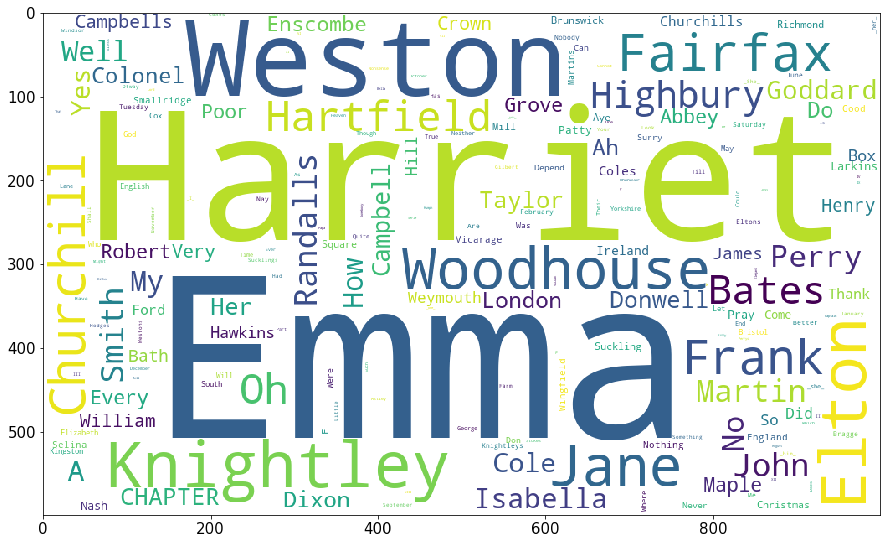

In [34]:
#워드 클라우드 그리기
from wordcloud import WordCloud

wc=WordCloud(width=1000, height=600, background_color='white',
            random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.show()